# Minatar CDT Test Results

In [2]:
import numpy as np
import matplotlib.pyplot as plt

def smooth(y, radius=200, mode='two_sided'):
    if len(y) < 2*radius+1:
        return np.ones_like(y) * y.mean()
    elif mode == 'two_sided':
        convkernel = np.ones(2 * radius+1)
        return np.convolve(y, convkernel, mode='same') / \
               np.convolve(np.ones_like(y), convkernel, mode='same')
    elif mode == 'causal':
        convkernel = np.ones(radius)
        out = np.convolve(y, convkernel,mode='full') / \
              np.convolve(np.ones_like(y), convkernel, mode='full')
        return out[:-radius+1]


## One pixel per car
Use _get_low_dimension_state()_ image processor.

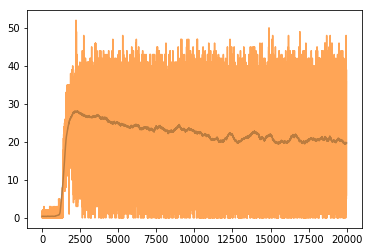

In [6]:
file_name='./log//no_plus/cdt_ppo_discrete_freewaydepth_33_id0'

r = np.load(file_name+'.npy')
x=np.arange(r.shape[0])

plt.plot(x,smooth(r))
plt.plot(x,r, alpha=0.7)
plt.savefig(file_name+'.png')
plt.show()

## Two pixels per car
Use _get_low_dimension_state_plus()_ image processor.

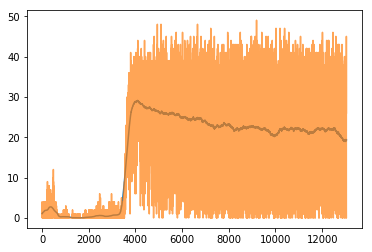

In [4]:
file_name='./log//plus/cdt_ppo_discrete_freewaydepth_33_id0'

r = np.load(file_name+'.npy')
x=np.arange(r.shape[0])

plt.plot(x,smooth(r))
plt.plot(x,r, alpha=0.7)
plt.savefig(file_name+'.png')
plt.show()

__Conclusions__: 

Both _get_low_dimension_state()_ and _get_low_dimension_state_plus()_ do not seem to work, actions taken by the policy are mostly just going forward, without capturing information from observations.